# Static maps  with matplotlib

- https://kodu.ut.ee/~kmoch/geopython2019/L6/

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

# Filepaths
grid_fp = "population_square_km.shp"

roads_fp = "roads.shp"

schools_fp = "schools_tartu.shp"

# Read files
grid = gpd.read_file(grid_fp)

roads = gpd.read_file(roads_fp)

schools = gpd.read_file(schools_fp)

In [2]:
gridCRS = grid.crs
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
schools['geometry'] = schools['geometry'].to_crs(crs=gridCRS)

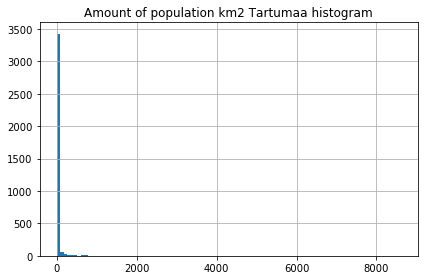

In [3]:
# Plot
grid.hist(column="Population", bins=100)
# Add title
plt.title("Amount of population km2 Tartumaa histogram")
plt.tight_layout()

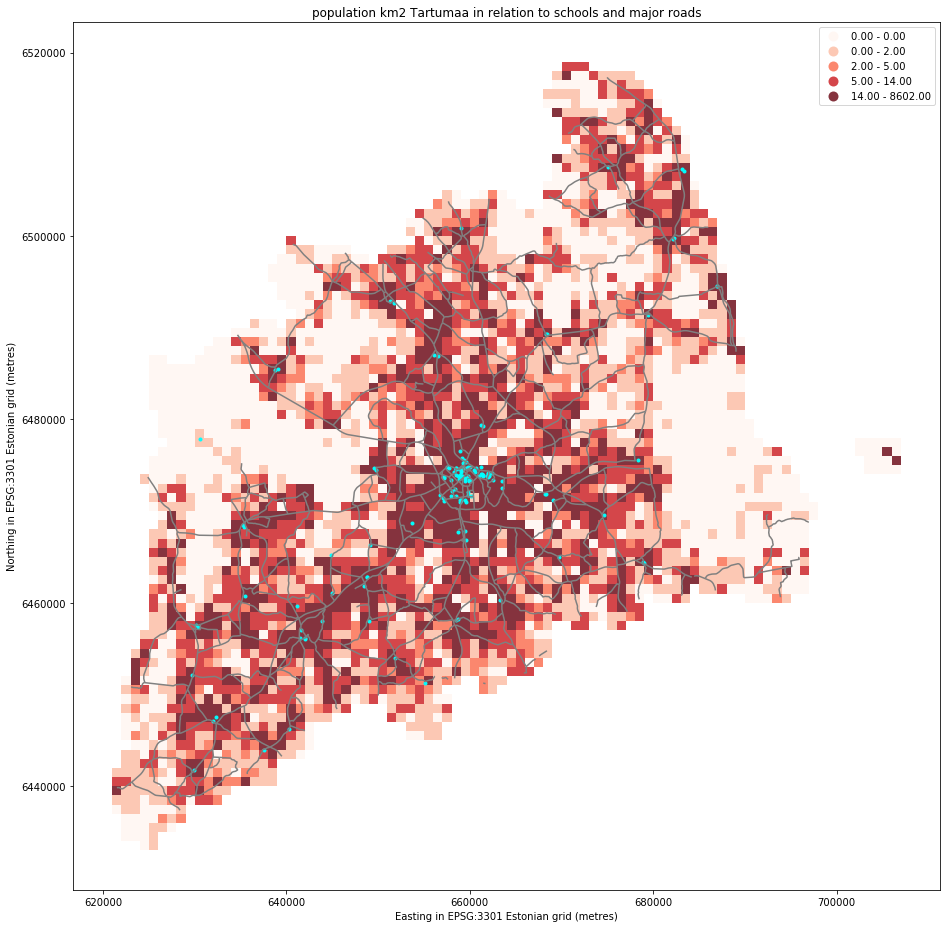

In [4]:
fig, ax = plt.subplots(figsize=(15, 13))

# Visualize the population density into 5 classes using "Quantiles" classification scheme
# Add also a little bit of transparency with `alpha` parameter
# (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)
grid.plot(column="Population", ax=ax, linewidth=0.03, cmap="Reds", scheme="quantiles", k=5, alpha=0.8, legend=True)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add schools on top of the previous map
schools.plot(ax=ax, color="cyan", markersize=9.0)

# Remove the empty white-space around the axes
plt.title("population km2 Tartumaa in relation to schools and major roads")

ax.set_ylabel('Northing in EPSG:3301 Estonian grid (metres)')
ax.set_xlabel('Easting in EPSG:3301 Estonian grid (metres)')

plt.tight_layout()

In [5]:
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

<Figure size 432x288 with 0 Axes>

# Interactive maps with Bokeh

- https://kodu.ut.ee/~kmoch/geopython2019/L6/

In [6]:
from bokeh.plotting import figure, output_file, output_notebook, show

In [7]:
# Initialize the plot (p) and give it a title
p = figure(title="My first interactive plot!")
p

Figure(id='1001', ...)

In [8]:
# Create a list of x-coordinates
x_coords = [0,1,2,3,4]

# Create a list of y-coordinates
y_coords = [5,4,1,2,0]

In [9]:
p.circle(x=x_coords, y=y_coords, size=10, color="red")

GlyphRenderer(id='1041', ...)

In [10]:
show(p)

In [11]:
import geopandas as gpd

# File path
points_fp = "schools_tartu.shp"

# Read the data
points = gpd.read_file(points_fp)

In [12]:
points.head()

,id,name,Aadress,X,y,geometry
0,13376,Aakre Lasteaed-Algkool,"Valga maakond, Puka vald, Aakre küla, Mõisa te...",629862.0000,6441779.000,POINT (629862.000 6441779.000)
1,13290,Alatskivi Lasteaed,"Tartu maakond, Alatskivi vald, Alatskivi alevi...",682186.9651,6499629.999,POINT (682186.965 6499629.999)
2,13396,Anna Haava nim Pala Kool,"Jõgeva maakond, Pala vald, Pala küla, Koolimaja",675030.0000,6507478.000,POINT (675030.000 6507478.000)
3,13202,Elva Gümnaasium,"Tartu maakond, Elva linn, Tartu mnt 3",641493.0000,6456152.000,POINT (641493.000 6456152.000)
4,13298,Elva Huviala-ja Kultuurikeskus Sinilind,"Tartu maakond, Elva linn, Kesk tn 30",641973.9625,6456196.951,POINT (641973.963 6456196.951)


In [13]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [14]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
points.head()

,id,name,Aadress,X,y,geometry,x
0,13376,Aakre Lasteaed-Algkool,"Valga maakond, Puka vald, Aakre küla, Mõisa te...",629862.0000,6441779.000,POINT (629862.000 6441779.000),629862.0000
1,13290,Alatskivi Lasteaed,"Tartu maakond, Alatskivi vald, Alatskivi alevi...",682186.9651,6499629.999,POINT (682186.965 6499629.999),682186.9651
2,13396,Anna Haava nim Pala Kool,"Jõgeva maakond, Pala vald, Pala küla, Koolimaja",675030.0000,6507478.000,POINT (675030.000 6507478.000),675030.0000
3,13202,Elva Gümnaasium,"Tartu maakond, Elva linn, Tartu mnt 3",641493.0000,6456152.000,POINT (641493.000 6456152.000),641493.0000
4,13298,Elva Huviala-ja Kultuurikeskus Sinilind,"Tartu maakond, Elva linn, Kesk tn 30",641973.9625,6456196.951,POINT (641973.963 6456196.951),641973.9625


In [15]:
# Make a copy and drop the geometry column
p_df = points.drop('geometry', axis=1).copy()

# See head
p_df.head(2)

,id,name,Aadress,X,y,x
0,13376,Aakre Lasteaed-Algkool,"Valga maakond, Puka vald, Aakre küla, Mõisa te...",629862.0000,6441779.000,629862.0000
1,13290,Alatskivi Lasteaed,"Tartu maakond, Alatskivi vald, Alatskivi alevi...",682186.9651,6499629.999,682186.9651


In [16]:
from bokeh.models import ColumnDataSource

# Point DataSource
psource = ColumnDataSource(p_df)

In [17]:
psource

ColumnDataSource(id='1118', ...)

In [18]:
# Initialize our plot figure
p = figure(title="A map of school location points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
p.circle('x', 'y', source=psource, color='red', size=10)

GlyphRenderer(id='1160', ...)

In [19]:
show(p)

In [20]:
from bokeh.models import HoverTool

In [21]:
my_hover = HoverTool()

In [22]:
my_hover.tooltips = [('Name of the School', '@name')]

In [23]:
p.add_tools(my_hover)

In [24]:
show(p)

In [25]:
import geopandas as gpd

# File path
roads_fp = "roads.shp"

# Read the data
roads = gpd.read_file(roads_fp)

In [26]:
roads.head()

,TYYP,geometry
0,Kõrvalmaantee,"LINESTRING (628395.967 6437374.941, 628230.700..."
1,Kõrvalmaantee,"LINESTRING (627016.000 6438859.770, 626942.160..."
2,Kõrvalmaantee,"LINESTRING (630462.518 6439009.709, 630496.794..."
3,Põhimaantee,"LINESTRING (630059.642 6438844.378, 630092.690..."
4,Kõrvalmaantee,"LINESTRING (630092.690 6439015.520, 630462.518..."


In [27]:
from shapely.geometry import LineString, MultiLineString
def getLineCoords(row, geom, coord_type):
    if isinstance(row[geom], MultiLineString):
        empty_l = []
        return empty_l
    else:
        if coord_type == 'x':
            return list( row[geom].coords.xy[0] )
        elif coord_type == 'y':
            return list( row[geom].coords.xy[1] )

In [28]:
# Calculate x coordinates of the line
roads['x'] = roads.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates of the line
roads['y'] = roads.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
roads.head()

,TYYP,geometry,x,y
0,Kõrvalmaantee,"LINESTRING (628395.967 6437374.941, 628230.700...","[628395.967023925, 628230.7000000704, 628170.1...","[6437374.940890101, 6437599.020451155, 6437663..."
1,Kõrvalmaantee,"LINESTRING (627016.000 6438859.770, 626942.160...","[627016.0000000595, 626942.160000056]","[6438859.770451147, 6438884.15045115]"
2,Kõrvalmaantee,"LINESTRING (630462.518 6439009.709, 630496.794...","[630462.5180000596, 630496.7935589477]","[6439009.709451153, 6438938.423092961]"
3,Põhimaantee,"LINESTRING (630059.642 6438844.378, 630092.690...","[630059.6421779364, 630092.690000058]","[6438844.378158718, 6439015.520451145]"
4,Kõrvalmaantee,"LINESTRING (630092.690 6439015.520, 630462.518...","[630092.690000058, 630462.5180000596]","[6439015.520451145, 6439009.709451153]"


In [29]:
# Make a copy and drop the geometry column
m_df = roads.drop('geometry', axis=1).copy()

# Point DataSource
msource = ColumnDataSource(m_df)

In [30]:
# Initialize our plot figure
p = figure(title="A map of Tartumaa Roads")

# Add the lines to the map from our 'msource' ColumnDataSource -object
p.multi_line('x', 'y', source=msource, color='red', line_width=3)

GlyphRenderer(id='1350', ...)

In [31]:
show(p)

In [32]:
road_hover = HoverTool()
road_hover.tooltips = [('Road type', '@TYYP')]
p.add_tools(road_hover)
show(p)

In [33]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import geopandas as gpd

grid_fp = "population_square_km.shp"
roads_fp = "roads.shp"
schools_fp = "schools_tartu.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
schools = gpd.read_file(schools_fp)

In [34]:
# Get the CRS of our grid
CRS = grid.crs
print(CRS)

# Convert the geometries of roads line and schools into that one
schools['geometry'] = schools['geometry'].to_crs(crs=CRS)
roads['geometry'] = roads['geometry'].to_crs(crs=CRS)

{'init': 'epsg:3301'}


In [35]:
print(schools['geometry'].head(1))
print(roads['geometry'].head(1))
print(grid['geometry'].head(1))

0    POINT (629862.000 6441779.000)
Name: geometry, dtype: geometry
0    LINESTRING (628395.967 6437374.941, 628230.700...
Name: geometry, dtype: geometry
0    POLYGON ((625000.000 6433000.000, 624000.000 6...
Name: geometry, dtype: geometry


In [36]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    # Parse the exterior of the coordinate
    exterior = row[geom].exterior
    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [37]:
# Get the Polygon x and y coordinates
grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
roads['x'] = roads.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
roads['y'] = roads.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the schools
schools['x'] = schools.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
schools['y'] = schools.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [38]:
grid[['x', 'y']].head(2)

,x,y
0,"[625000.0000000006, 624000.000000004, 624000.0...","[6432999.999999995, 6432999.999999995, 6434000..."
1,"[622999.9999999993, 622000.0000000027, 622000....","[6434000.0, 6434000.0, 6434999.999999996, 6434..."


In [39]:
import pysal.viz.mapclassify as mc
# Initialize the classifier and apply it
classifier = mc.Quantiles.make(k=5)
grid['pop_km2'] = grid[['Population']].apply(classifier)
# What do we have now?
grid.head(2)

C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


,STAMP_CRE,Population,geometry,x,y,pop_km2
0,1899-12-30,0,"POLYGON ((625000.000 6433000.000, 624000.000 6...","[625000.0000000006, 624000.000000004, 624000.0...","[6432999.999999995, 6432999.999999995, 6434000...",0
1,1899-12-30,0,"POLYGON ((623000.000 6434000.000, 622000.000 6...","[622999.9999999993, 622000.0000000027, 622000....","[6434000.0, 6434000.0, 6434999.999999996, 6434...",0


In [40]:
# Make a copy, drop the geometry column and create ColumnDataSource
m_df = roads.drop('geometry', axis=1).copy()
msource = ColumnDataSource(m_df)

# Make a copy, drop the geometry column and create ColumnDataSource
p_df = schools.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)

# Make a copy, drop the geometry column and create ColumnDataSource
g_df = grid.drop('geometry', axis=1).copy()
gsource = ColumnDataSource(g_df)

In [41]:
# Let's first do some coloring magic that converts the color palet into map numbers (it's okey not to understand)
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper

# Create the color mapper
color_mapper = LogColorMapper(palette=palette)

In [42]:
# Initialize our figure
p = figure(title="Population per km2 compared to Road network in Tartu")

# Plot grid
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'pop_km2', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

# Add roads on top of the same figure
p.multi_line('x', 'y', source=msource, color="red", line_width=2)

# Add schools on top (as yellow points)
p.circle('x', 'y', size=3, source=psource, color="yellow")

# let's also add the hover over info tool
tooltip = HoverTool()
tooltip.tooltips = [('Name  of the school', '@name'),
                    ('Type of road', '@TYYP'),
                    ('Population density', '@Population')]
p.add_tools(tooltip)

In [43]:
show(p)

In [44]:
# Convert the geometries
grid_proj = grid.to_crs(epsg=3857)
schools_proj = schools.to_crs(epsg=3857)
roads_proj = roads.to_crs(epsg=3857)

# Get the Polygon x and y coordinates
grid_proj['x'] = grid_proj.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid_proj['y'] = grid_proj.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the line
roads_proj['x'] = roads_proj.apply(getLineCoords, geom='geometry', coord_type='x', axis=1)
roads_proj['y'] = roads_proj.apply(getLineCoords, geom='geometry', coord_type='y', axis=1)

# Calculate x and y coordinates of the schools
schools_proj['x'] = schools_proj.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
schools_proj['y'] = schools_proj.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [45]:
# Make a copy, drop the geometry column and create ColumnDataSource
grid_proj = grid_proj.drop('geometry', axis=1).copy()
grid_proj_source = ColumnDataSource(grid_proj)

# Make a copy, drop the geometry column and create ColumnDataSource
roads_proj = roads_proj.drop('geometry', axis=1).copy()
roads_proj_source = ColumnDataSource(roads_proj)

# Make a copy, drop the geometry column and create ColumnDataSource
schools_proj = schools_proj.drop('geometry', axis=1).copy()
schools_proj_source = ColumnDataSource(schools_proj)

In [46]:
from bokeh.tile_providers import get_provider, Vendors

from bokeh.palettes import RdPu9
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar, Legend, LegendItem

# Initialize our figure
p = figure(title="Population per km2 compared to Road network in Tartu",
           x_range=(2899000,3065000), y_range=(7980000,8140000),
           x_axis_type="mercator", y_axis_type="mercator")


# instatiate the tile source provider
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# add the back ground basemap
p.add_tile(tile_provider)

# instantiate a new colormapper
color_mapper_v = LinearColorMapper(palette=RdPu9,
                                low=grid_proj['pop_km2'].min(),
                                high=grid_proj['pop_km2'].max())

# Plot grid
p.patches('x', 'y', source=grid_proj_source,
         fill_color={'field': 'pop_km2', 'transform': color_mapper_v},
         fill_alpha=0.7, line_color="black", line_width=0.05)

# build a legend scale for the grid population classes
color_bar = ColorBar(color_mapper=color_mapper_v, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

# and add this additional legend scale bar to the plot
p.add_layout(color_bar, 'right')

# Add roads on top of the same figure
p.multi_line('x', 'y', source=roads_proj_source, color="red", line_width=2)

# Add schools on top (as yellow points)
p.circle('x', 'y', size=3, source=schools_proj_source, color="yellow")

# now let's develop a custom legend for our 3 active layers
# the first rendered layer (p.renderers[0]) is the TileRenderer of our background map!
# here we link the rendered layer to a legend item
li1 = LegendItem(label='Pop Km2 Grid', renderers=[p.renderers[1]])
li2 = LegendItem(label='Roads', renderers=[p.renderers[2]])
li3 = LegendItem(label='Schools', renderers=[p.renderers[3]])

# then we put them together into an actual legend and place it on the plot
legend1 = Legend(items=[li1, li2, li3], location='top_right')
p.add_layout(legend1)

# we can even make this interactive and de-/activate layers
p.legend.click_policy="hide"

# let's also add the hover over info tool
tooltip = HoverTool()

tooltip.tooltips = [('Name  of the school', '@name'),
                    ('Type of road', '@TYYP')]
p.add_tools(tooltip)


show(p)